<a href="https://colab.research.google.com/github/vbloise3/Data_Science/blob/master/WorkingWithData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

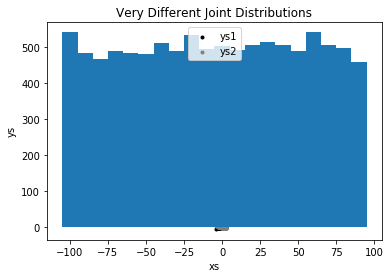

0.9010493686379609
-0.8920981526880033


In [9]:
from typing import List , Dict 
from collections import Counter 
import math 
import matplotlib.pyplot as plt 
import random 

Vector = List[float]

def covariance(xs: List[float], ys: List[float]) -> float:
    assert len(xs) == len(ys), "xs and ys must have same number of elements"

    return dot(de_mean(xs), de_mean(ys)) / (len(xs) - 1)

def dot(v: Vector, w: Vector) -> float:
    """Computes v_1 * w_1 + ... + v_n * w_n"""
    assert len(v) == len(w), "vectors must be same length"

    return sum(v_i * w_i for v_i, w_i in zip(v, w))

def sum_of_squares(v: Vector) -> float:
    """Returns v_1 * v_1 + ... + v_n * v_n"""
    return dot(v, v)

def mean(xs: List[float]) -> float:
    return sum(xs) / len(xs)

def de_mean(xs: List[float]) -> List[float]:
    """Translate xs by subtracting its mean (so the result has mean 0)"""
    x_bar = mean(xs)
    return [x - x_bar for x in xs]

def variance(xs: List[float]) -> float:
    """Almost the average squared deviation from the mean"""
    assert len(xs) >= 2, "variance requires at least two elements"

    n = len(xs)
    deviations = de_mean(xs)
    return sum_of_squares(deviations) / (n - 1)

def standard_deviation(xs: List[float]) -> float:
    """The standard deviation is the square root of the variance"""
    return math.sqrt(variance(xs))

def correlation(xs: List[float], ys: List[float]) -> float:
    """Measures how much xs and ys vary in tandem about their means"""
    stdev_x = standard_deviation(xs)
    stdev_y = standard_deviation(ys)
    if stdev_x > 0 and stdev_y > 0:
        return covariance(xs, ys) / stdev_x / stdev_y
    else:
        return 0    # if no variation, correlation is zero

def normal_cdf(x: float, mu: float = 0, sigma: float = 1) -> float:
    return (1 + math.erf((x - mu) / math.sqrt(2) / sigma)) / 2

def inverse_normal_cdf(p: float,
                       mu: float = 0,
                       sigma: float = 1,
                       tolerance: float = 0.00001) -> float:
    """Find approximate inverse using binary search"""

    # if not standard, compute standard and rescale
    if mu != 0 or sigma != 1:
        return mu + sigma * inverse_normal_cdf(p, tolerance=tolerance)

    low_z = -10.0                      # normal_cdf(-10) is (very close to) 0
    hi_z  =  10.0                      # normal_cdf(10)  is (very close to) 1
    while hi_z - low_z > tolerance:
        mid_z = (low_z + hi_z) / 2     # Consider the midpoint
        mid_p = normal_cdf(mid_z)      # and the cdf's value there
        if mid_p < p:
            low_z = mid_z              # Midpoint too low, search above it
        else:
            hi_z = mid_z               # Midpoint too high, search below it

    return mid_z

def bucketize( point: float, bucket_size: float)-> float: 
  """ Floor the point to the next lower multiple of bucket_size""" 
  return bucket_size * math.floor( point / bucket_size)

def make_histogram( points: List[ float], bucket_size: float)-> Dict[ float, int]: 
  """ Buckets the points and counts how many in each bucket""" 
  return Counter( bucketize( point, bucket_size) for point in points)

def plot_histogram( points: List[ float], bucket_size: float, title: str = ""): 
  histogram = make_histogram( points, bucket_size) 
  plt.bar( histogram.keys(), histogram.values(), width = bucket_size) 
  plt.title( title)

def random_normal()-> float: 
  """ Returns a random draw from a standard normal distribution""" 
  return inverse_normal_cdf( random.random())

random.seed( 0)
# uniform between-100 and 100 
uniform = [200 * random.random()-100 for _ in range( 10000)]
# normal distribution with mean 0, standard deviation 57 
normal = [57 * inverse_normal_cdf( random.random()) for _ in range( 10000)]

plot_histogram( uniform, 10, "Uniform Histogram")

xs = [random_normal() for _ in range( 1000)] 
ys1 = [ x + random_normal() / 2 for x in xs] 
ys2 = [-x + random_normal() / 2 for x in xs]
plt.scatter( xs, ys1, marker ='.', color ='black', label ='ys1')
plt.scatter( xs, ys2, marker ='.', color ='gray', label ='ys2') 
plt.xlabel('xs') 
plt.ylabel('ys') 
plt.legend( loc = 9) 
plt.title("Very Different Joint Distributions") 
plt.show()

print( correlation( xs, ys1)) # about 0.9 
print( correlation( xs, ys2)) # about-0.9